In [1]:
# !sudo apt update
# !sudo apt install libgl1-mesa-glx -y
# !python3 -c "import cv2"

In [2]:
# !pip install opencv-python
# %pip install --upgrade pip

# Mapping the RGB pixels

In [3]:
import cv2

# Load an image
image = cv2.imread("example.jpg")

# Get the RGB values of a pixel at (x=50, y=100)
b, g, r = image[100, 50]  # OpenCV loads images in BGR format by default
print(f"Red: {r}, Green: {g}, Blue: {b}")

Red: 174, Green: 156, Blue: 136


# Transforming between color spaces

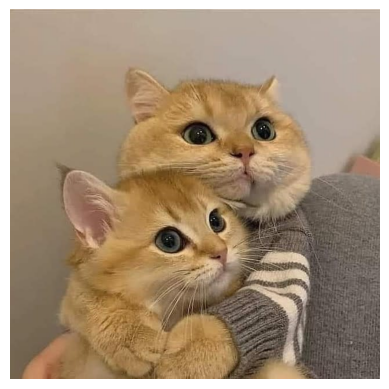

In [4]:
import cv2
import matplotlib.pyplot as plt

# Load image in BGR (default in OpenCV)
image = cv2.imread("example.jpg")

# Convert BGR to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display image
plt.imshow(image_rgb)
plt.axis("off")
plt.show()

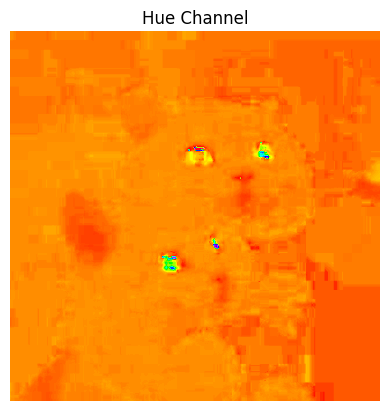

In [5]:
# Convert RGB to HSV
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Show HSV channels separately
h, s, v = cv2.split(image_hsv)
plt.imshow(h, cmap="hsv")
plt.title("Hue Channel")
plt.axis("off")
plt.show()

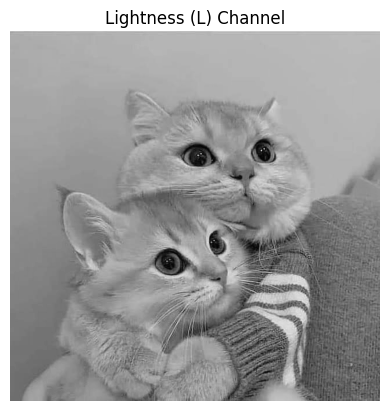

In [6]:
# Convert to LAB
image_lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

# Split channels
l, a, b = cv2.split(image_lab)

# Display Lightness channel
plt.imshow(l, cmap="gray")
plt.title("Lightness (L) Channel")
plt.axis("off")
plt.show()

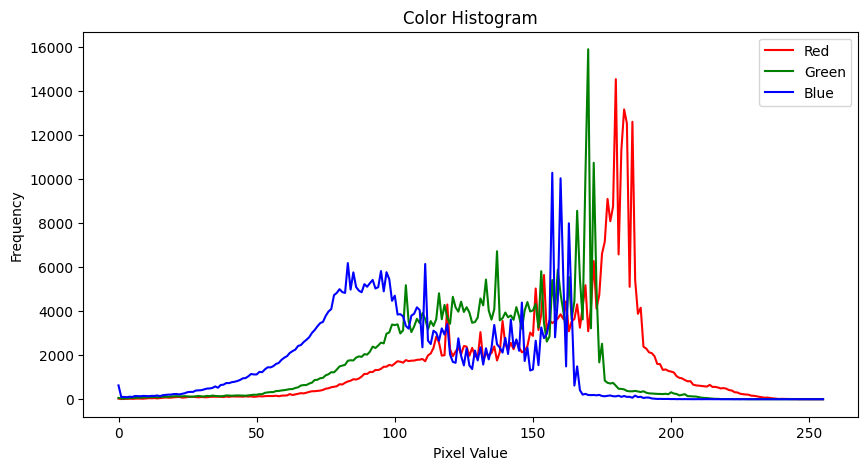

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
image = cv2.imread("example.jpg")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Split channels
r, g, b = cv2.split(image_rgb)

# Compute histograms
hist_r = cv2.calcHist([r], [0], None, [256], [0, 256])
hist_g = cv2.calcHist([g], [0], None, [256], [0, 256])
hist_b = cv2.calcHist([b], [0], None, [256], [0, 256])

# Plot histograms
plt.figure(figsize=(10, 5))
plt.plot(hist_r, color="red", label="Red")
plt.plot(hist_g, color="green", label="Green")
plt.plot(hist_b, color="blue", label="Blue")
plt.title("Color Histogram")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.legend()
plt.show()

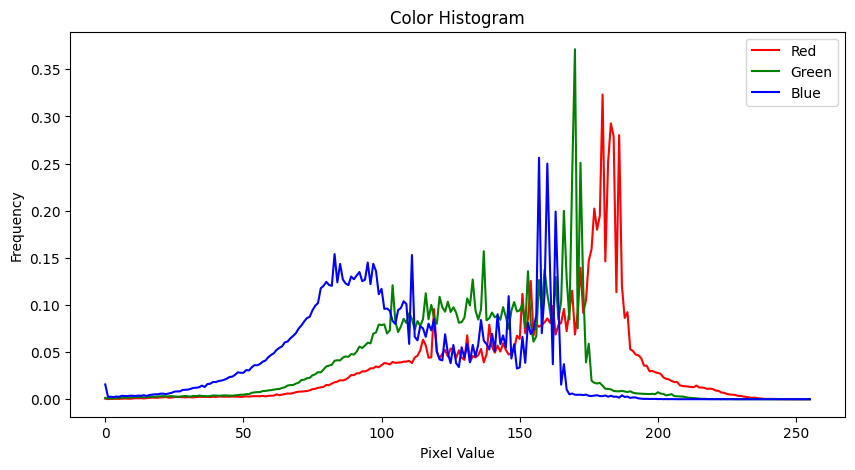

In [8]:
hist_r = cv2.normalize(hist_r, hist_r).flatten()
hist_g = cv2.normalize(hist_g, hist_g).flatten()
hist_b = cv2.normalize(hist_b, hist_b).flatten()

# Plot histograms
plt.figure(figsize=(10, 5))
plt.plot(hist_r, color="red", label="Red")
plt.plot(hist_g, color="green", label="Green")
plt.plot(hist_b, color="blue", label="Blue")
plt.title("Color Histogram")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.legend()
plt.show()

In [9]:
def chi_square_distance(hist1, hist2):
    return 0.5 * np.sum(((hist1 - hist2) ** 2) / (hist1 + hist2 + 1e-10))

distance = chi_square_distance(hist_r, hist_g)
print("Chi-Square Distance between Red and Green histograms:", distance)


Chi-Square Distance between Red and Green histograms: 2.1586764


In [12]:
def euclidean_distance(hist1, hist2):
    return np.sqrt(np.sum((hist1 - hist2) ** 2))

distance = euclidean_distance(hist_r, hist_g)
print("Euclidean Distance:", distance)

Euclidean Distance: 0.9215349


In [10]:
import numpy as np

def histogram_intersection(hist1, hist2):
    return np.sum(np.minimum(hist1, hist2))

# Example usage
distance = histogram_intersection(hist_r, hist_g)
print("Histogram Intersection:", distance)

Histogram Intersection: 5.5667043


In [13]:
def histogram_correlation(hist1, hist2):
    mean_hist1 = np.mean(hist1)
    mean_hist2 = np.mean(hist2)
    
    numerator = np.sum((hist1 - mean_hist1) * (hist2 - mean_hist2))
    denominator = np.sqrt(np.sum((hist1 - mean_hist1) ** 2) * np.sum((hist2 - mean_hist2) ** 2))
    
    return numerator / denominator if denominator != 0 else 0  # Avoid division by zero

# Example usage
correlation_score = histogram_correlation(hist_r, hist_g)
print("Histogram Correlation Score:", correlation_score)


Histogram Correlation Score: 0.3565099
